In [2]:
#Import Required Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
# Load and Preprocess the Data

# Load the dataset
df = pd.read_csv('../../data/processed/Imputed_Final_Merged_Canada_Dataset.csv')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

# Remove commas from 'All industries GDP' and convert it to numeric
df['All industries GDP'] = df['All industries GDP'].replace({',': ''}, regex=True).astype(float)

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Normalize the data (excluding the 'Date' column)
scaler = StandardScaler()
X = df.drop(columns=['Single_Family_Benchmark_SA', 'Townhouse_Benchmark_SA', 'Date'])
X_scaled = scaler.fit_transform(X)

# Prepare target variables
y_single_family = df['Single_Family_Benchmark_SA']
y_townhouse = df['Townhouse_Benchmark_SA']


In [19]:
# Split the Data into Training and Testing Sets
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(X_scaled, y_single_family, test_size=0.2, random_state=42)
X_train_th, X_test_th, y_train_th, y_test_th = train_test_split(X_scaled, y_townhouse, test_size=0.2, random_state=42)


In [39]:
# Step 2: Define a Baseline Model
# ==============================

# Define a function named 'build_nn_model' that takes 'input_shape' as an argument.
# 'input_shape' represents the number of features (input dimensions) of the data.
def build_nn_model(input_shape):


    # Create a Sequential model. A Sequential model is a linear stack of layers, where each layer has exactly one input tensor and one output tensor.
    model = Sequential([        
        # Add the first Dense (fully connected) layer with 64 neurons (units).
        # 'input_dim=input_shape' specifies the number of input features to this layer.
        # 'activation='relu'' sets the activation function for this layer to ReLU (Rectified Linear Unit), which introduces non-linearity to the model.
        Dense(64, input_dim=input_shape, activation='relu'),
        
        # Add a second Dense layer with 32 neurons and ReLU activation function.
        # No need to specify 'input_dim' here because the layer automatically infers the input shape from the previous layer's output.
        Dense(32, activation='relu'),
        
        # Add a third Dense layer with 16 neurons and ReLU activation function.
        Dense(16, activation='relu'),
        
        # Add the output Dense layer with 1 neuron. This is because we are doing regression, where we predict a single continuous value.
        # 'activation='linear'' is used because, in regression tasks, we often want the output to be a linear combination of inputs (no activation function) 
        Dense(1, activation='linear')
    ])

    # Compile the model by specifying the optimizer, loss function, and evaluation metrics.
    # 'optimizer=Adam(learning_rate=0.001)' sets the Adam optimizer with a learning rate of 0.001. Adam is an efficient optimization algorithm that adjusts learning rates during training.
    # 'loss='mse'' specifies the loss function to be Mean Squared Error (MSE), which is commonly used in regression tasks.
    # 'metrics=['mae']' specifies Mean Absolute Error (MAE) as an additional metric to evaluate model performance during training.    
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

    return model

In [40]:
# Build models for both Single Family and Townhouse predictions
nn_model_sf = build_nn_model(X_train_sf.shape[1])
nn_model_th = build_nn_model(X_train_th.shape[1])


In [41]:
# Train the Model

# Train the model for Single Family Benchmark SA
history_sf = nn_model_sf.fit(X_train_sf, y_train_sf, validation_data=(X_test_sf, y_test_sf), epochs=50, batch_size=16, verbose=1)

# Train the model for Townhouse Benchmark SA
history_th = nn_model_th.fit(X_train_th, y_train_th, validation_data=(X_test_th, y_test_th), epochs=50, batch_size=16, verbose=1)



Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 271720169472.0000 - mae: 491031.7500 - val_loss: 305843535872.0000 - val_mae: 521803.6875
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 284693692416.0000 - mae: 503168.3750 - val_loss: 305563828224.0000 - val_mae: 521558.0312
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 272659775488.0000 - mae: 494909.5000 - val_loss: 304222961664.0000 - val_mae: 520381.2812
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 278433759232.0000 - mae: 496875.3125 - val_loss: 299559878656.0000 - val_mae: 516306.2188
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 281202655232.0000 - mae: 500207.7500 - val_loss: 286930731008.0000 - val_mae: 505135.5625
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 248764956672.0000 - mae: 471736.5000 - val_loss: 258725691392.0000 - val_mae: 479206.4688
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 216784470016.0000 - mae: 437360.0625 - val_loss

In [42]:
# Evaluate the model for Single Family
loss_sf, mae_sf = nn_model_sf.evaluate(X_test_sf, y_test_sf, verbose=0)
print(f'Single Family Benchmark SA - Mean Absolute Error: {mae_sf}')

# Evaluate the model for Townhouse
loss_th, mae_th = nn_model_th.evaluate(X_test_th, y_test_th, verbose=0)
print(f'Townhouse Benchmark SA - Mean Absolute Error: {mae_th}')


Single Family Benchmark SA - Mean Absolute Error: 43909.1953125
Townhouse Benchmark SA - Mean Absolute Error: 28501.41796875


The **Mean Absolute Error (MAE) values** - 43,909 for Single Family Benchmark SA and 28,501 for Townhouse Benchmark SA — indicate the average absolute difference between your model's predictions and the actual (prices). 

Here's how to interpret and potentially improve these results:

**Interpretation:**

- **High MAE Values:** These MAE values suggest that, on average, the predictions are off by around $43,909 and $28,501 for the Single Family and Townhouse benchmarks, respectively. Depending on the typical range of house prices in your dataset, this may or may not be acceptable.

- **Complexity of the Problem:** House prices can be influenced by a wide range of factors, some of which might not be captured well by the model. Non-linear relationships, interactions between features, and external economic conditions can all affect the accuracy.

**Steps to Improve the Model:**

1. **Feature Engineering:**

    -  **Add More Relevant Features:** If you have access to additional data, such as neighborhood details, proximity to amenities, or historical price trends, including these could improve the model.

    - **Interaction Features:** Consider creating interaction terms (e.g., Interest Rate * Unemployment Rate) to capture more complex relationships.

2. **Hyperparameter Tuning:**
    - Experiment with different neural network architectures, such as varying the number of layers, neurons per layer, and activation functions.

    - Adjust the learning rate, batch size, and number of epochs to see if these changes reduce the MAE.

3. **Regularization:**

    - **Dropout Layers:** Introduce dropout layers in the neural network to prevent overfitting.
    - **L1/L2 Regularization:** Add regularization to the dense layers to penalize large weights and potentially improve generalization.

4. **Model Complexity:**

    - **Deepen the Network:** Increase the number of layers or neurons per layer to allow the model to learn more complex patterns.

    - **Ensemble Methods:** Consider using an ensemble of models, such as combining neural networks with other non-linear models like Random Forest or Gradient Boosting, to improve predictions.

5. **Cross-Validation:**
    - Use cross-validation to ensure that the model is not overfitting to a particular train-test split. This can provide a more reliable estimate of model performance.

6. **Data Augmentation:**
    
    - **Increase the Dataset Size:** If possible, gather more data to train the model better. More data can help the model generalize better and reduce error.




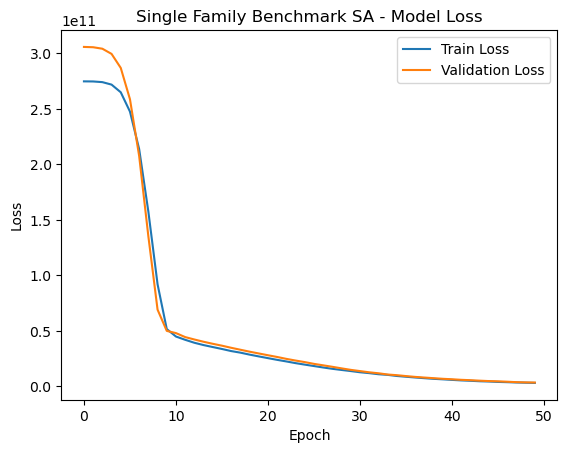

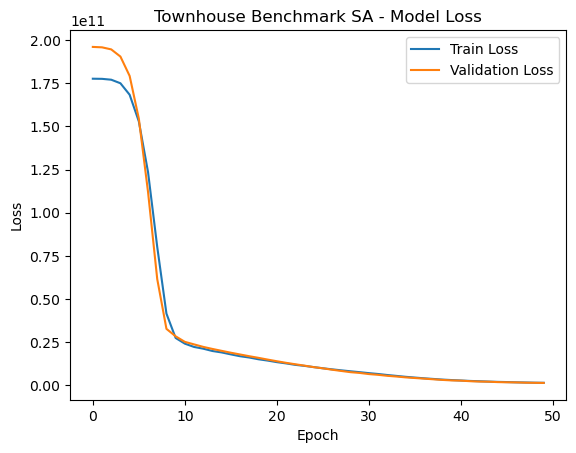

In [43]:
# Plotting the training history for Single Family
plt.plot(history_sf.history['loss'], label='Train Loss')
plt.plot(history_sf.history['val_loss'], label='Validation Loss')
plt.title('Single Family Benchmark SA - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training history for Townhouse
plt.plot(history_th.history['loss'], label='Train Loss')
plt.plot(history_th.history['val_loss'], label='Validation Loss')
plt.title('Townhouse Benchmark SA - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [44]:
# Predict on the test set for Single Family
y_pred_sf = nn_model_sf.predict(X_test_sf)

# Predict on the test set for Townhouse
y_pred_th = nn_model_th.predict(X_test_th)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


In [45]:
# Save the model in the newer Keras format
nn_model_sf.save('single_family_nn_model.keras')
nn_model_th.save('townhouse_nn_model.keras')